# DATA 2022

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
from io import StringIO

In [3]:
# Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df = pd.read_csv("/content/drive/MyDrive/datos/Base de datos ad_viz_plotval_data_2022 (4).csv")
df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2022,AQS,60070008,3,27,ug/m3 SC,25,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
1,01/02/2022,AQS,60070008,3,19,ug/m3 SC,18,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
2,01/03/2022,AQS,60070008,3,8,ug/m3 SC,7,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
3,01/04/2022,AQS,60070008,3,6,ug/m3 SC,6,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
4,01/11/2022,AQS,60070008,3,24,ug/m3 SC,22,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047


In [80]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36085 entries, 0 to 36084
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           36085 non-null  object 
 1   Source                         36085 non-null  object 
 2   Site ID                        36085 non-null  int64  
 3   POC                            36085 non-null  int64  
 4   Daily Mean PM10 Concentration  36085 non-null  int64  
 5   Units                          36085 non-null  object 
 6   Daily AQI Value                36085 non-null  int64  
 7   Local Site Name                36085 non-null  object 
 8   Daily Obs Count                36085 non-null  int64  
 9   Percent Complete               36085 non-null  float64
 10  AQS Parameter Code             36085 non-null  int64  
 11  AQS Parameter Description      36085 non-null  object 
 12  Method Code                    36085 non-null 

In [81]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Site ID,POC,Daily Mean PM10 Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
count,3.608500e+04,36085.000000,36085.000000,36085.000000,36085.0,36085.0,36085.0,36085.000000,33613.000000,36085.0,36085.000000,36085.000000,36085.000000
mean,6.052895e+07,2.674020,28.439268,25.272967,1.0,100.0,81102.0,123.459332,31505.172999,6.0,52.735735,35.897817,-119.089045
std,2.715799e+05,1.413317,70.685844,72.342850,0.0,0.0,0.0,37.738339,11780.114554,0.0,27.105995,1.929365,1.987081
min,6.007001e+07,1.000000,-7.000000,0.000000,1.0,100.0,81102.0,63.000000,12540.000000,6.0,7.000000,32.578165,-124.179490
10%,6.023100e+07,1.000000,7.000000,6.000000,1.0,100.0,81102.0,79.000000,13860.000000,6.0,23.000000,33.572019,-121.618549
25%,6.027100e+07,2.000000,13.000000,12.000000,1.0,100.0,81102.0,122.000000,20940.000000,6.0,27.000000,34.243100,-120.599980
50%,6.051000e+07,3.000000,21.000000,19.000000,1.0,100.0,81102.0,122.000000,37100.000000,6.0,51.000000,36.049402,-118.966520
75%,6.073102e+07,3.000000,34.000000,31.000000,1.0,100.0,81102.0,122.000000,41740.000000,6.0,73.000000,37.360684,-117.715066
90%,6.083201e+07,4.000000,51.000000,47.000000,1.0,100.0,81102.0,141.000000,42200.000000,6.0,83.000000,38.610905,-116.768293
max,6.113200e+07,8.000000,7681.000000,8368.000000,1.0,100.0,81102.0,246.000000,49700.000000,6.0,113.000000,40.776780,-115.483070


In [82]:
df.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM10 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')

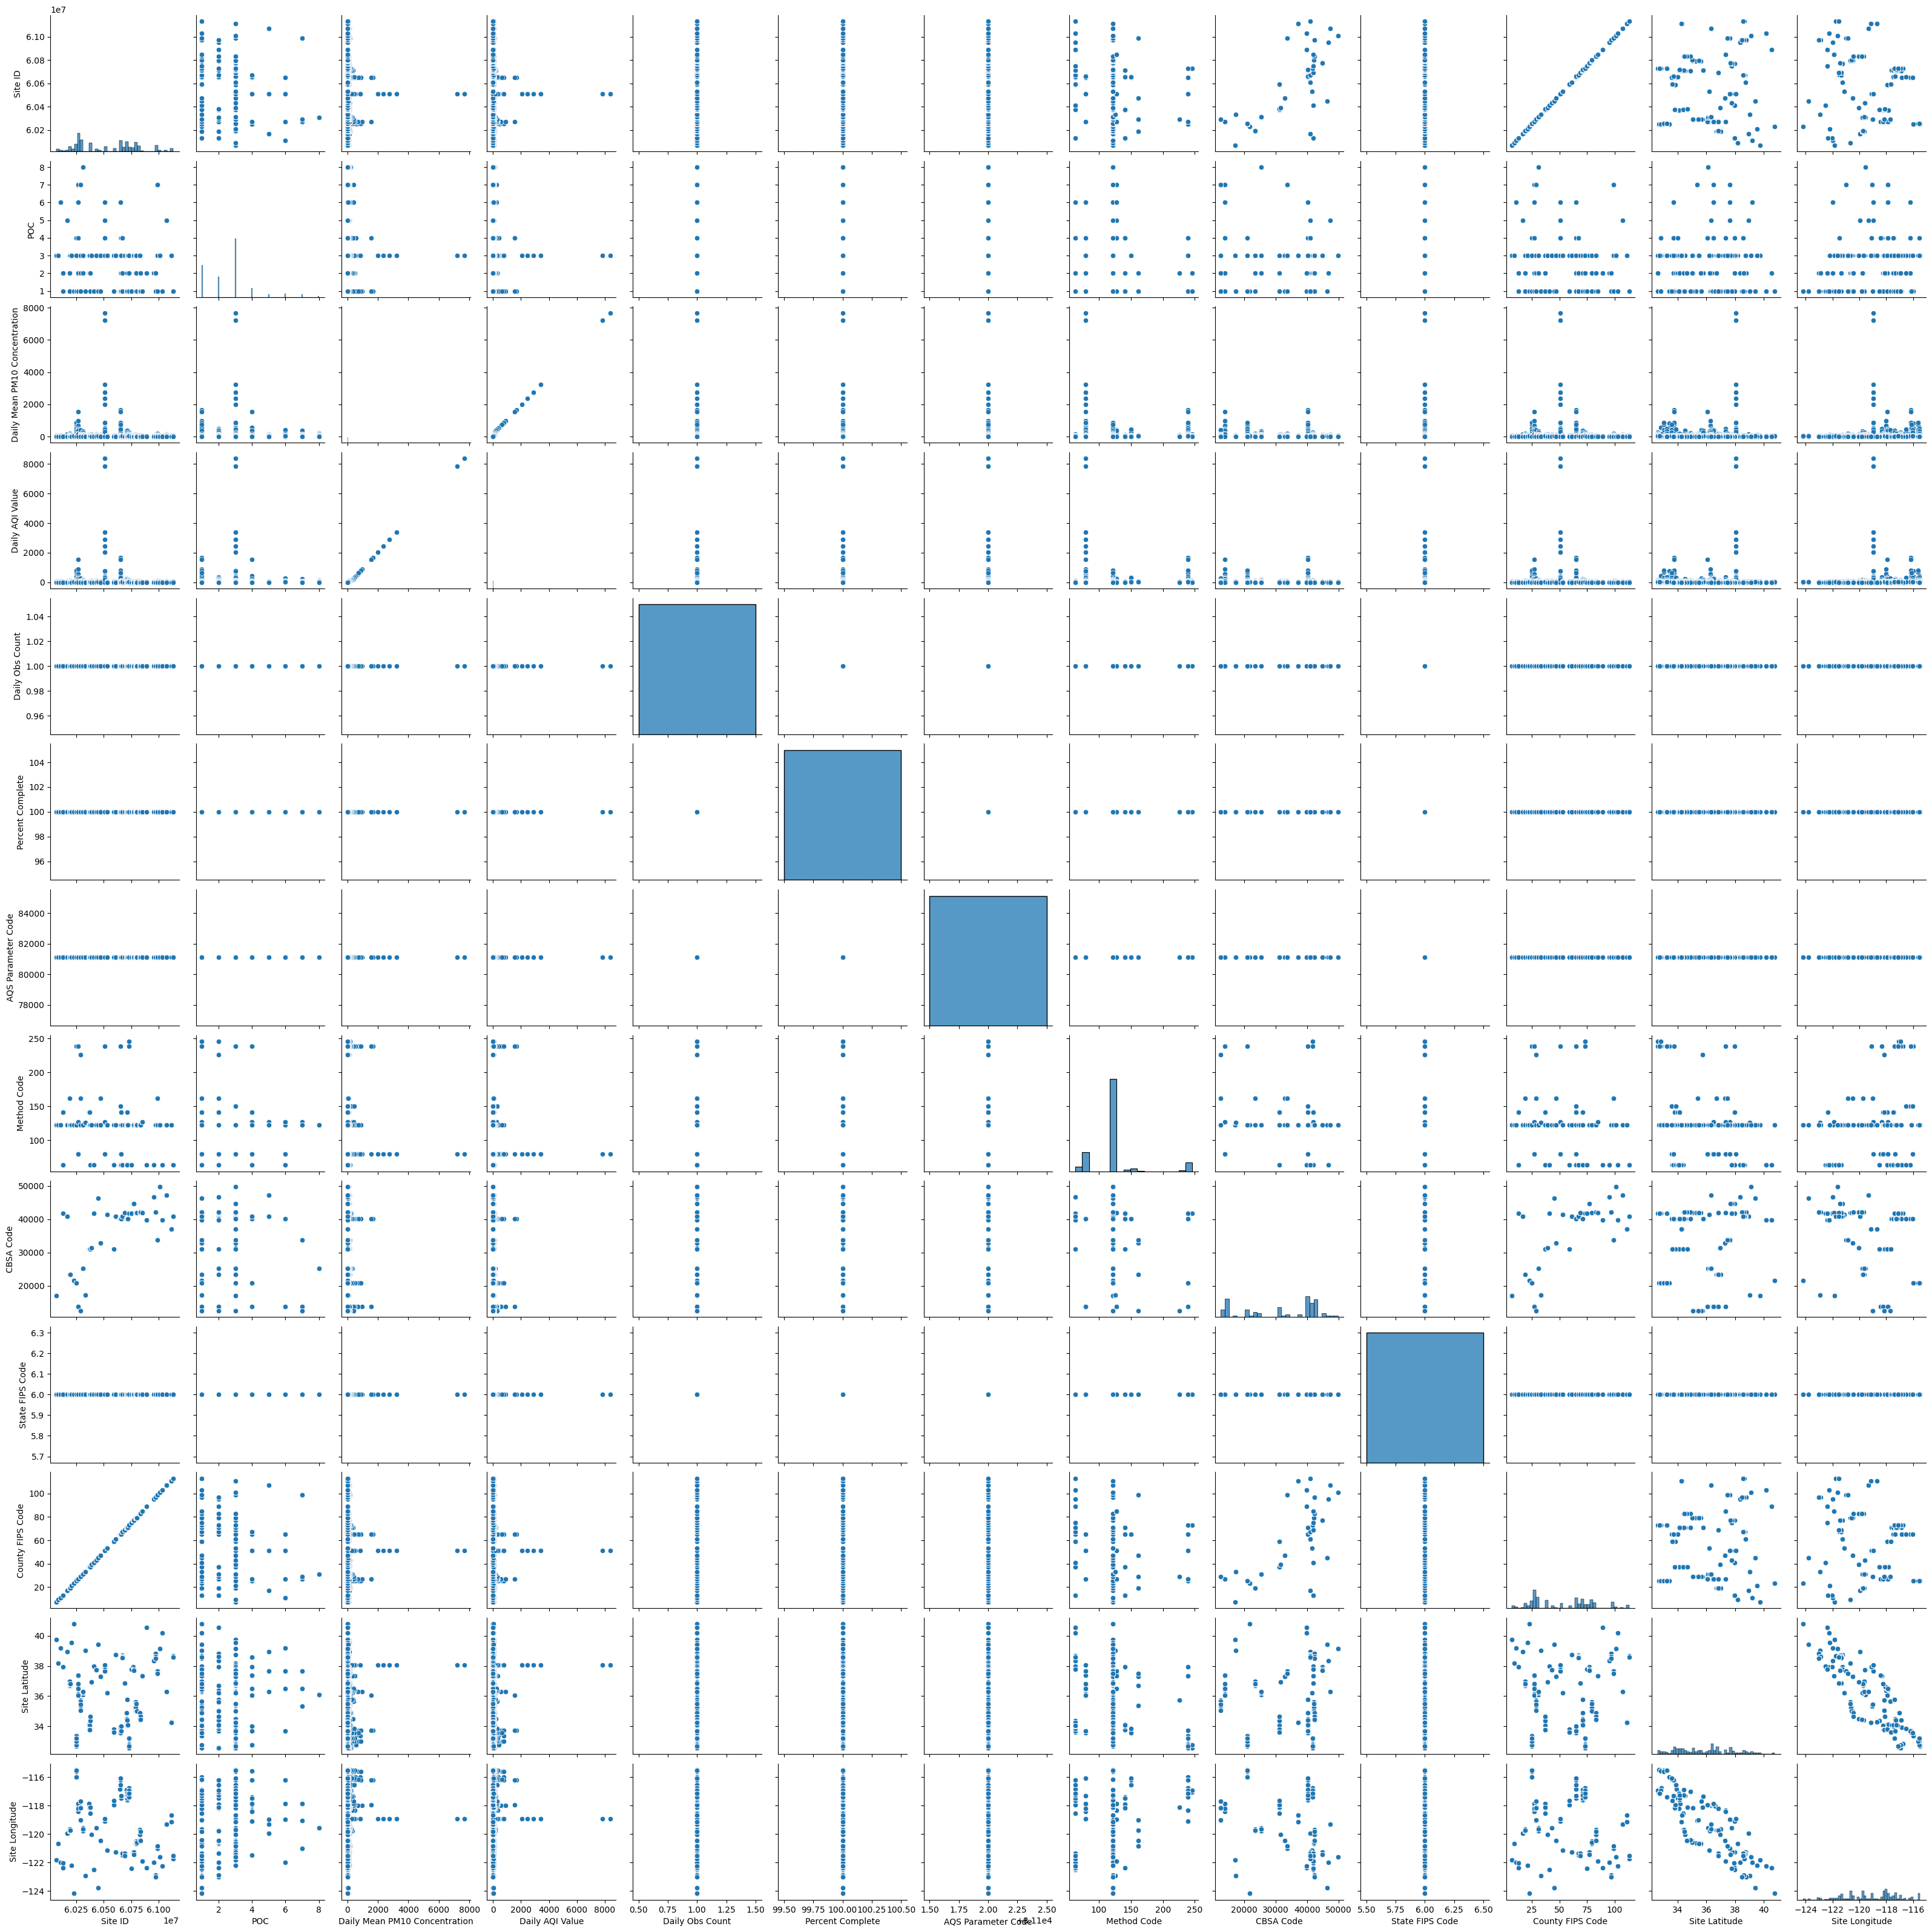

In [83]:
sns.pairplot(df)

<Axes: ylabel='Frequency'>

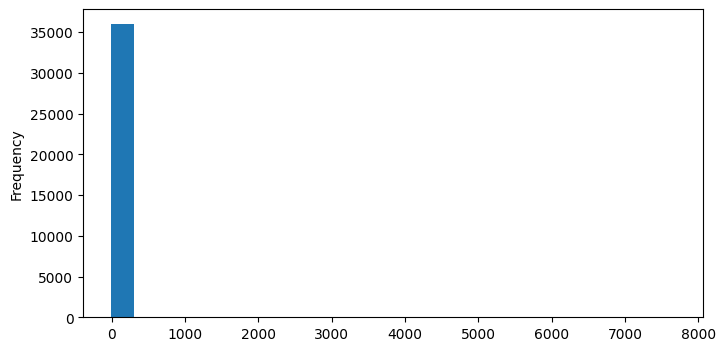

In [84]:
df['Daily Mean PM10 Concentration'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

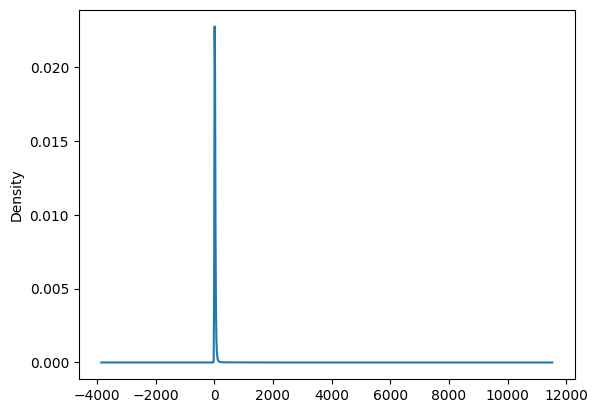

In [85]:
df['Daily Mean PM10 Concentration'].plot.density()

<Axes: ylabel='Frequency'>

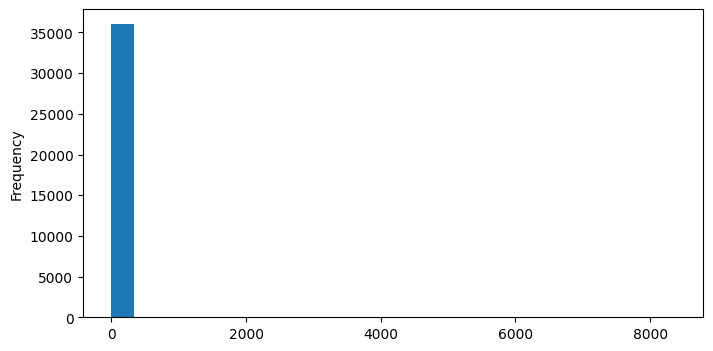

In [86]:
df['Daily AQI Value'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

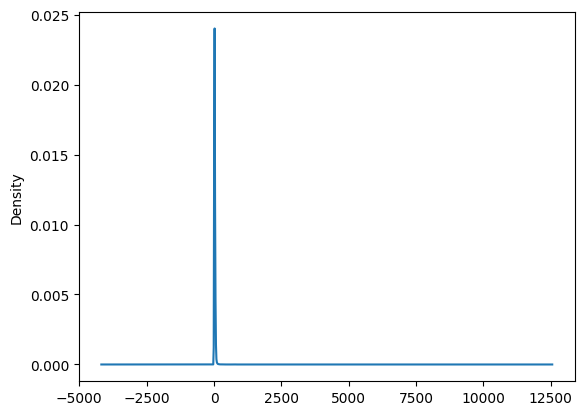

In [87]:
df['Daily AQI Value'].plot.density()

In [88]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Site ID,POC,Daily Mean PM10 Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
Site ID,1.000000,-0.079635,-0.032746,-0.022706,NaN,NaN,NaN,0.103614,0.814441,NaN,0.999963,-0.123487,-0.227806
POC,-0.079635,1.000000,0.034927,0.029884,NaN,NaN,NaN,0.001985,-0.049430,NaN,-0.079517,0.082303,-0.034183
Daily Mean PM10 Concentration,-0.032746,0.034927,1.000000,0.989815,NaN,NaN,NaN,0.028787,-0.059363,NaN,-0.032898,-0.075761,0.093407
Daily AQI Value,-0.022706,0.029884,0.989815,1.000000,NaN,NaN,NaN,0.020914,-0.047844,NaN,-0.022845,-0.059586,0.073308
Daily Obs Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percent Complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQS Parameter Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Method Code,0.103614,0.001985,0.028787,0.020914,NaN,NaN,NaN,1.000000,0.188248,NaN,0.104366,-0.242161,0.147540
CBSA Code,0.814441,-0.049430,-0.059363,-0.047844,NaN,NaN,NaN,0.188248,1.000000,NaN,0.813270,-0.053100,-0.330753
State FIPS Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

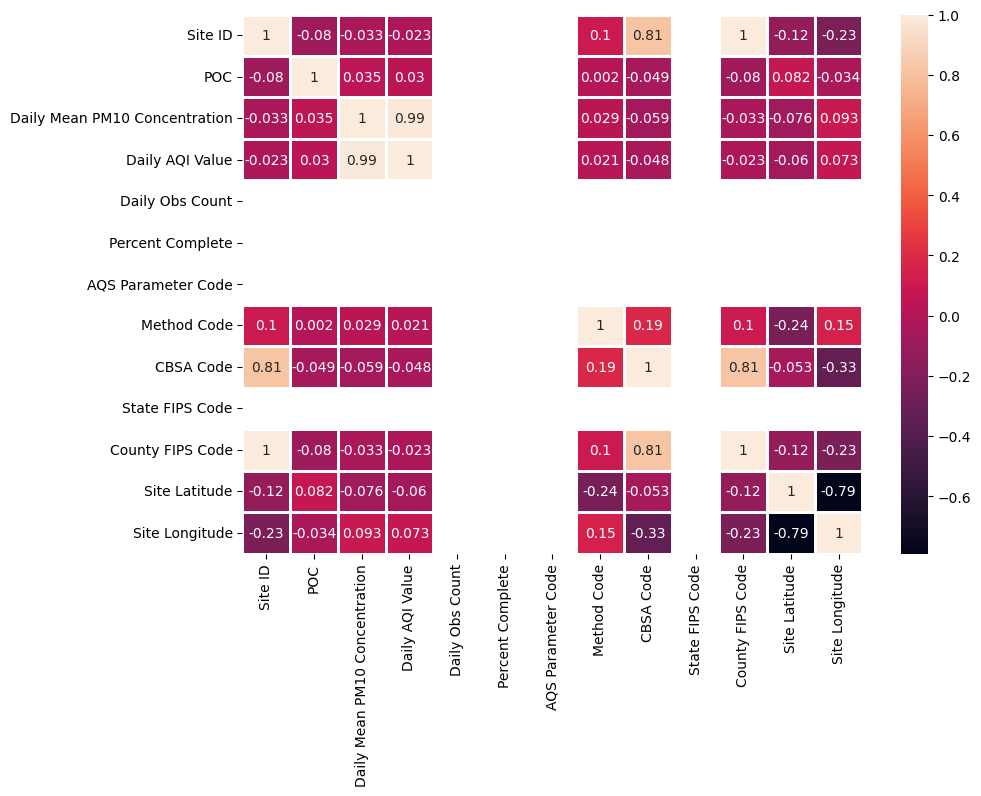

In [90]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

In [91]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['Date',
 'Source',
 'Site ID',
 'POC',
 'Daily Mean PM10 Concentration',
 'Units',
 'Daily AQI Value',
 'Local Site Name',
 'Daily Obs Count',
 'Percent Complete',
 'AQS Parameter Code',
 'AQS Parameter Description',
 'Method Code',
 'CBSA Code',
 'CBSA Name',
 'State FIPS Code',
 'State',
 'County FIPS Code',
 'County',
 'Site Latitude',
 'Site Longitude']

In [92]:
X = df[l_column[4:len_feature-16]]
y = df[l_column[len_feature-15]]

In [93]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (36085, 1)
Tamaño de Variable Objetivo: (36085,)


In [94]:
X.head()

,Daily Mean PM10 Concentration
0,27
1,19
2,8
3,6
4,24


In [95]:
y.head()

,Daily AQI Value
0,25
1,18
2,7
3,6
4,22


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [98]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (25259, 1)
Tamaño del conjunto de características de prueba: (10826, 1)
Tamaño de la variable objetivo del entrenamiento: (25259,)
Tamaño de la variable objetivo de prueba: (10826,)


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [100]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Ejemplo de datos de entrenamiento
# Asegúrate de que X_train e y_train estén definidos correctamente
# X_train debería ser una matriz de 2D (n_samples, n_features)
# y_train debería ser un vector o una matriz de 1D (n_samples,)

# Ejemplo de inicialización de datos
X_train = np.array([[1, 2], [2, 3], [3, 4]])  # Reemplaza con tus datos
y_train = np.array([2, 3, 4])  # Reemplaza con tus datos

# Creando un objeto de Regresión Lineal 'lm'
lm = LinearRegression()

# Ajustando el modelo lineal con los datos de entrenamiento
lm.fit(X_train, y_train)

# Ejemplo de predicción (opcional)
# X_test = np.array([[4, 5]])  # Reemplaza con tus datos
# y_pred = lm.predict(X_test)
# print(y_pred)


LinearRegression()

In [101]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: 0.5000000000000004


In [102]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [0.5 0.5]


In [103]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Ejemplo de datos de entrenamiento con pandas DataFrame
X_train = pd.DataFrame({
    'Feature1': [1, 2, 3],
    'Feature2': [2, 3, 4]
})
y_train = np.array([2, 3, 4])

# Creando un objeto de Regresión Lineal 'lm'
lm = LinearRegression()

# Ajustando el modelo lineal con los datos de entrenamiento
lm.fit(X_train, y_train)

# Creando un DataFrame para almacenar los coeficientes
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
print(cdf)


          Coefficients
Feature1           0.5
Feature2           0.5


In [104]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Ejemplo de datos de entrenamiento con pandas DataFrame
X_train = pd.DataFrame({
    'Feature1': [1, 2, 3],
    'Feature2': [2, 3, 4]
})
y_train = np.array([2, 3, 4])

# Creando un objeto de Regresión Lineal 'lm'
lm = LinearRegression()

# Ajustando el modelo lineal con los datos de entrenamiento
lm.fit(X_train, y_train)

# Creando un DataFrame para almacenar los coeficientes
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])

# Cálculo del error estándar y estadísticos t
n = X_train.shape[0]  # Número de observaciones
k = X_train.shape[1]  # Número de predictores
dfN = n - k  # Grados de libertad

# Predicciones en los datos de entrenamiento
train_pred = lm.predict(X_train)

# Cálculo del error cuadrático
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)

# Inicialización correcta de la lista 'se' con la longitud 'k'
se = [0] * k

for i in range(k):
    r = (sum_error / dfN)
    r = r / np.sum(np.square(X_train.iloc[:, i] - X_train.iloc[:, i].mean()))
    se[i] = np.sqrt(r)

# Agregando el error estándar y el estadístico t al DataFrame 'cdf'
cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']

# Mostrar el DataFrame con los resultados
print(cdf)


          Coefficients  Standard Error  t-statistic
Feature1           0.5             0.0          inf
Feature2           0.5             0.0          inf


In [105]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir la concentración de PM10\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadas en orden de importancia para predecir la concentración de PM10
------------------------------------------------------------------------------------------
Feature1 > 
Feature2


In [106]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Asegurándote de que las columnas en l existen en df
l = list(cdf.index)
for feature in l:
    if feature not in df.columns:
        print(f"La columna '{feature}' no se encuentra en el DataFrame.")
        continue

# Crear la figura y la rejilla de subplots
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3)

# Graficar solo si la columna existe en df
if l[0] in df.columns:
    ax = plt.subplot(gs[0])
    ax.scatter(df[l[0]], df['Daily AQI Value'])
    ax.set_title(f"{l[0]} vs. Daily AQI Value", fontdict={'fontsize': 20})

plt.show()


La columna 'Feature1' no se encuentra en el DataFrame.
La columna 'Feature2' no se encuentra en el DataFrame.


<Figure size 1800x1000 with 0 Axes>

In [107]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 1.0


# Previsto - 2022

In [109]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv("/content/drive/MyDrive/datos/Base de datos ad_viz_plotval_data_2022 (4).csv")

# Seleccionar las características y la variable objetivo
# Aquí, se seleccionan las columnas 'Daily Mean PM2.5 Concentration' y 'Daily AQI Value' como características (X),
# y 'Daily AQI Value' como la variable objetivo (y)
X = df[['Daily Mean PM10 Concentration', 'Daily AQI Value']]
y = df['Daily AQI Value']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Crear y ajustar el modelo de regresión lineal
lm = LinearRegression()
lm.fit(X_train, y_train)

# Asegúrate de que las columnas de X_test coincidan con las de X_train
X_test = X_test[X_train.columns]

# Realizar predicciones en el conjunto de prueba
predictions = lm.predict(X_test)

# Mostrar el tipo del objeto predicho
print("Tipo del objeto predicho:", type(predictions))

# Mostrar el tamaño del objeto predicho
print("Tamaño del objeto predicho:", predictions.shape)

# Opcional: Imprimir los primeros 5 valores predichos para visualización
print("Primeros 5 valores predichos:", predictions[:5])


Tipo del objeto predicho: <class 'numpy.ndarray'>
Tamaño del objeto predicho: (10826,)
Primeros 5 valores predichos: [ 3. 30.  4. 73.  4.]


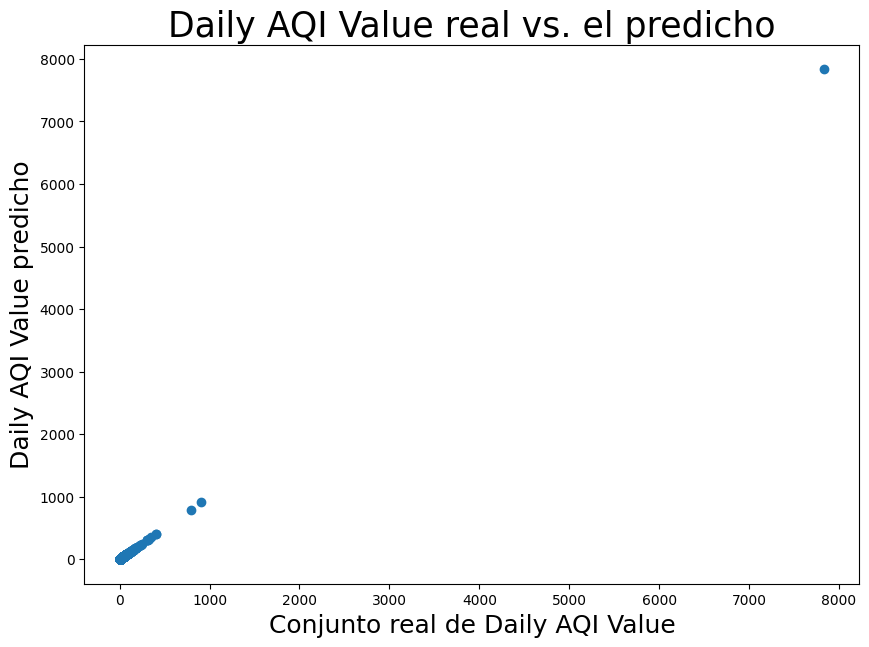

In [110]:
plt.figure(figsize=(10,7))
plt.title("Daily AQI Value real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de Daily AQI Value",fontsize=18)
plt.ylabel("Daily AQI Value predicho", fontsize=18)
plt.scatter(x=y_test,y=predictions)

<ipython-input-113-796888ce873c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histograma de residuos para verificar la normalidad '}, xlabel='Residuos', ylabel='Densidad del kernel'>

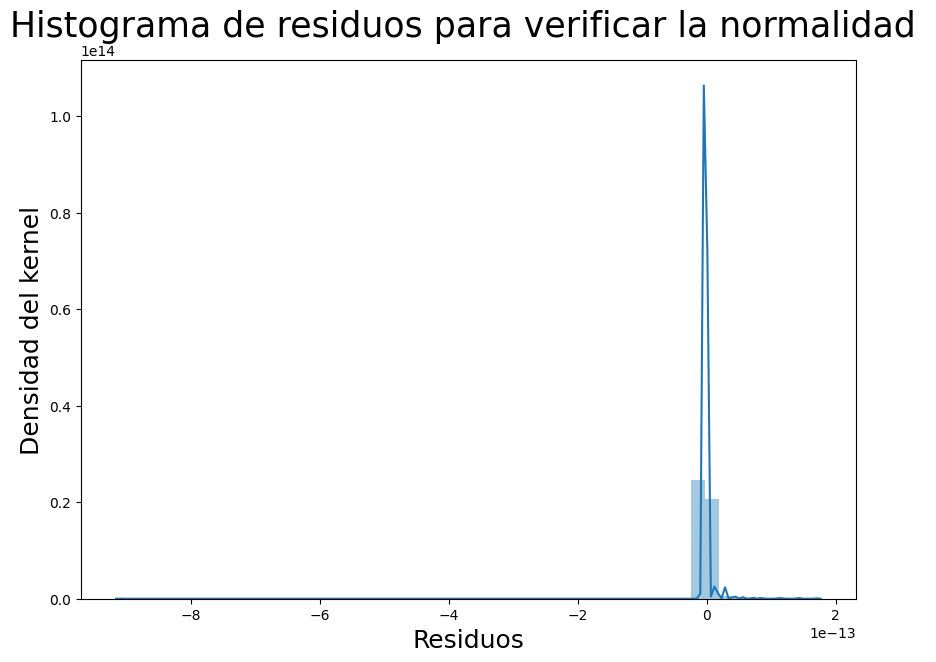

In [113]:
plt.figure(figsize=(10,7))
plt.title("Histograma de residuos para verificar la normalidad ",fontsize=25)
plt.xlabel("Residuos",fontsize=18)
plt.ylabel("Densidad del kernel", fontsize=18)
sns.distplot([y_test-predictions])

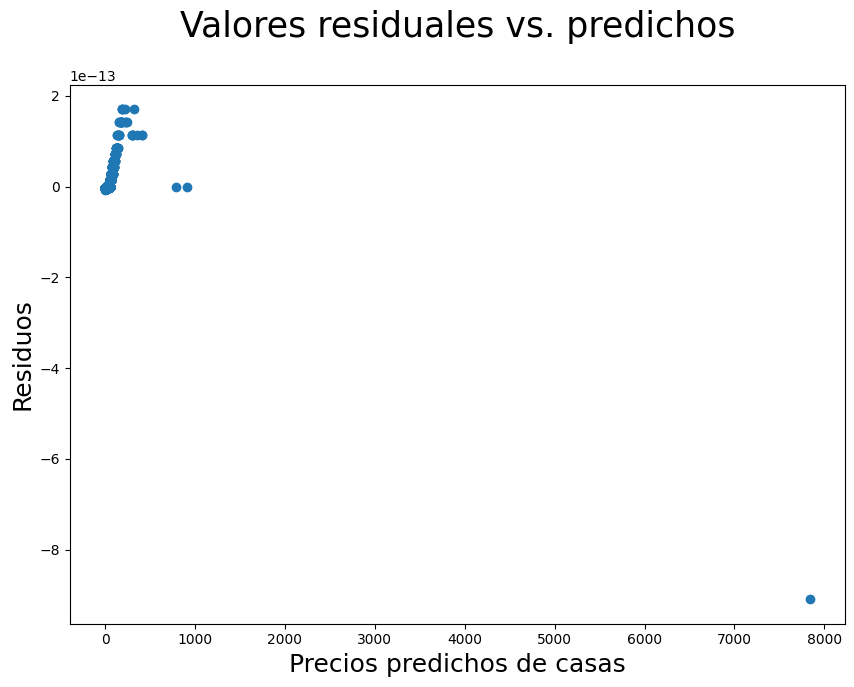

In [114]:
plt.figure(figsize=(10,7))
plt.title("Valores residuales vs. predichos\n",fontsize=25)
plt.xlabel("Precios predichos de casas",fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

In [115]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 3.612692696055093e-15
Mean square error (MSE): 1.779298504857587e-28
Root mean square error (RMSE): 1.3339034840863064e-14


In [116]:
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Valor R-squared de las predicciones: 1.0


# DATA 2023

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests
from io import StringIO

In [117]:
df = pd.read_csv("/content/drive/MyDrive/datos/Base de datos ad_viz_plotval_data_2023 (3) (1).csv")
df.head()
try:
    response = requests.get(df)
    response.raise_for_status()  # Verifica si hubo errores en la solicitud
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data)
    print(df)
except Exception as e:
    print(f'Ocurrió un error: {e}')

Ocurrió un error: Invalid URL 'Date Source   Site ID  POC  Daily Mean PM10 Concentration  \\\n0      01/01/2023    AQS  60070008    3                              7   \n1      01/02/2023    AQS  60070008    3                              9   \n2      01/03/2023    AQS  60070008    3                              5   \n3      01/04/2023    AQS  60070008    3                              4   \n4      01/05/2023    AQS  60070008    3                              3   \n...           ...    ...       ...  ...                            ...   \n36956  12/02/2023    AQS  61132001    1                              7   \n36957  12/08/2023    AQS  61132001    1                              6   \n36958  12/14/2023    AQS  61132001    1                             38   \n36959  12/20/2023    AQS  61132001    1                              7   \n36960  12/26/2023    AQS  61132001    1                             24   \n\n          Units  Daily AQI Value              Local Site Name  \\\n0      ug/m3

In [118]:
df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2023,AQS,60070008,3,7,ug/m3 SC,6,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
1,01/02/2023,AQS,60070008,3,9,ug/m3 SC,8,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
2,01/03/2023,AQS,60070008,3,5,ug/m3 SC,5,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
3,01/04/2023,AQS,60070008,3,4,ug/m3 SC,4,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
4,01/05/2023,AQS,60070008,3,3,ug/m3 SC,3,Chico-East Avenue,1,100.0,...,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047


In [119]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36961 entries, 0 to 36960
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           36961 non-null  object 
 1   Source                         36961 non-null  object 
 2   Site ID                        36961 non-null  int64  
 3   POC                            36961 non-null  int64  
 4   Daily Mean PM10 Concentration  36961 non-null  int64  
 5   Units                          36961 non-null  object 
 6   Daily AQI Value                36961 non-null  int64  
 7   Local Site Name                36961 non-null  object 
 8   Daily Obs Count                36961 non-null  int64  
 9   Percent Complete               36961 non-null  float64
 10  AQS Parameter Code             36961 non-null  int64  
 11  AQS Parameter Description      36961 non-null  object 
 12  Method Code                    36428 non-null 

In [120]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Site ID,POC,Daily Mean PM10 Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
count,3.696100e+04,36961.000000,36961.000000,36961.000000,36961.0,36961.0,36961.0,36428.000000,34677.000000,36961.0,36961.000000,36961.000000,36961.000000
mean,6.054034e+07,2.720976,23.492330,21.049539,1.0,100.0,81102.0,149.513506,31837.446146,6.0,53.878331,35.841164,-119.087763
std,2.743163e+05,1.401370,28.593717,23.756547,0.0,0.0,0.0,120.180684,11849.529921,0.0,27.385992,1.987392,1.972932
min,6.007001e+07,1.000000,-11.000000,0.000000,1.0,100.0,81102.0,63.000000,12540.000000,6.0,7.000000,32.552824,-124.179490
10%,6.025000e+07,1.000000,6.000000,6.000000,1.0,100.0,81102.0,79.000000,13860.000000,6.0,25.000000,33.032500,-121.618549
25%,6.027100e+07,2.000000,10.000000,9.000000,1.0,100.0,81102.0,122.000000,20940.000000,6.0,27.000000,34.144350,-120.599980
50%,6.053001e+07,3.000000,18.000000,17.000000,1.0,100.0,81102.0,122.000000,40140.000000,6.0,53.000000,35.774460,-118.966520
75%,6.073103e+07,3.000000,29.000000,27.000000,1.0,100.0,81102.0,122.000000,41740.000000,6.0,73.000000,37.360684,-117.492400
90%,6.083201e+07,4.000000,45.000000,42.000000,1.0,100.0,81102.0,226.000000,42200.000000,6.0,83.000000,38.610905,-116.921374
max,6.113200e+07,8.000000,1799.000000,1829.000000,1.0,100.0,81102.0,639.000000,49700.000000,6.0,113.000000,40.776780,-115.483070


In [121]:
df.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM10 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')

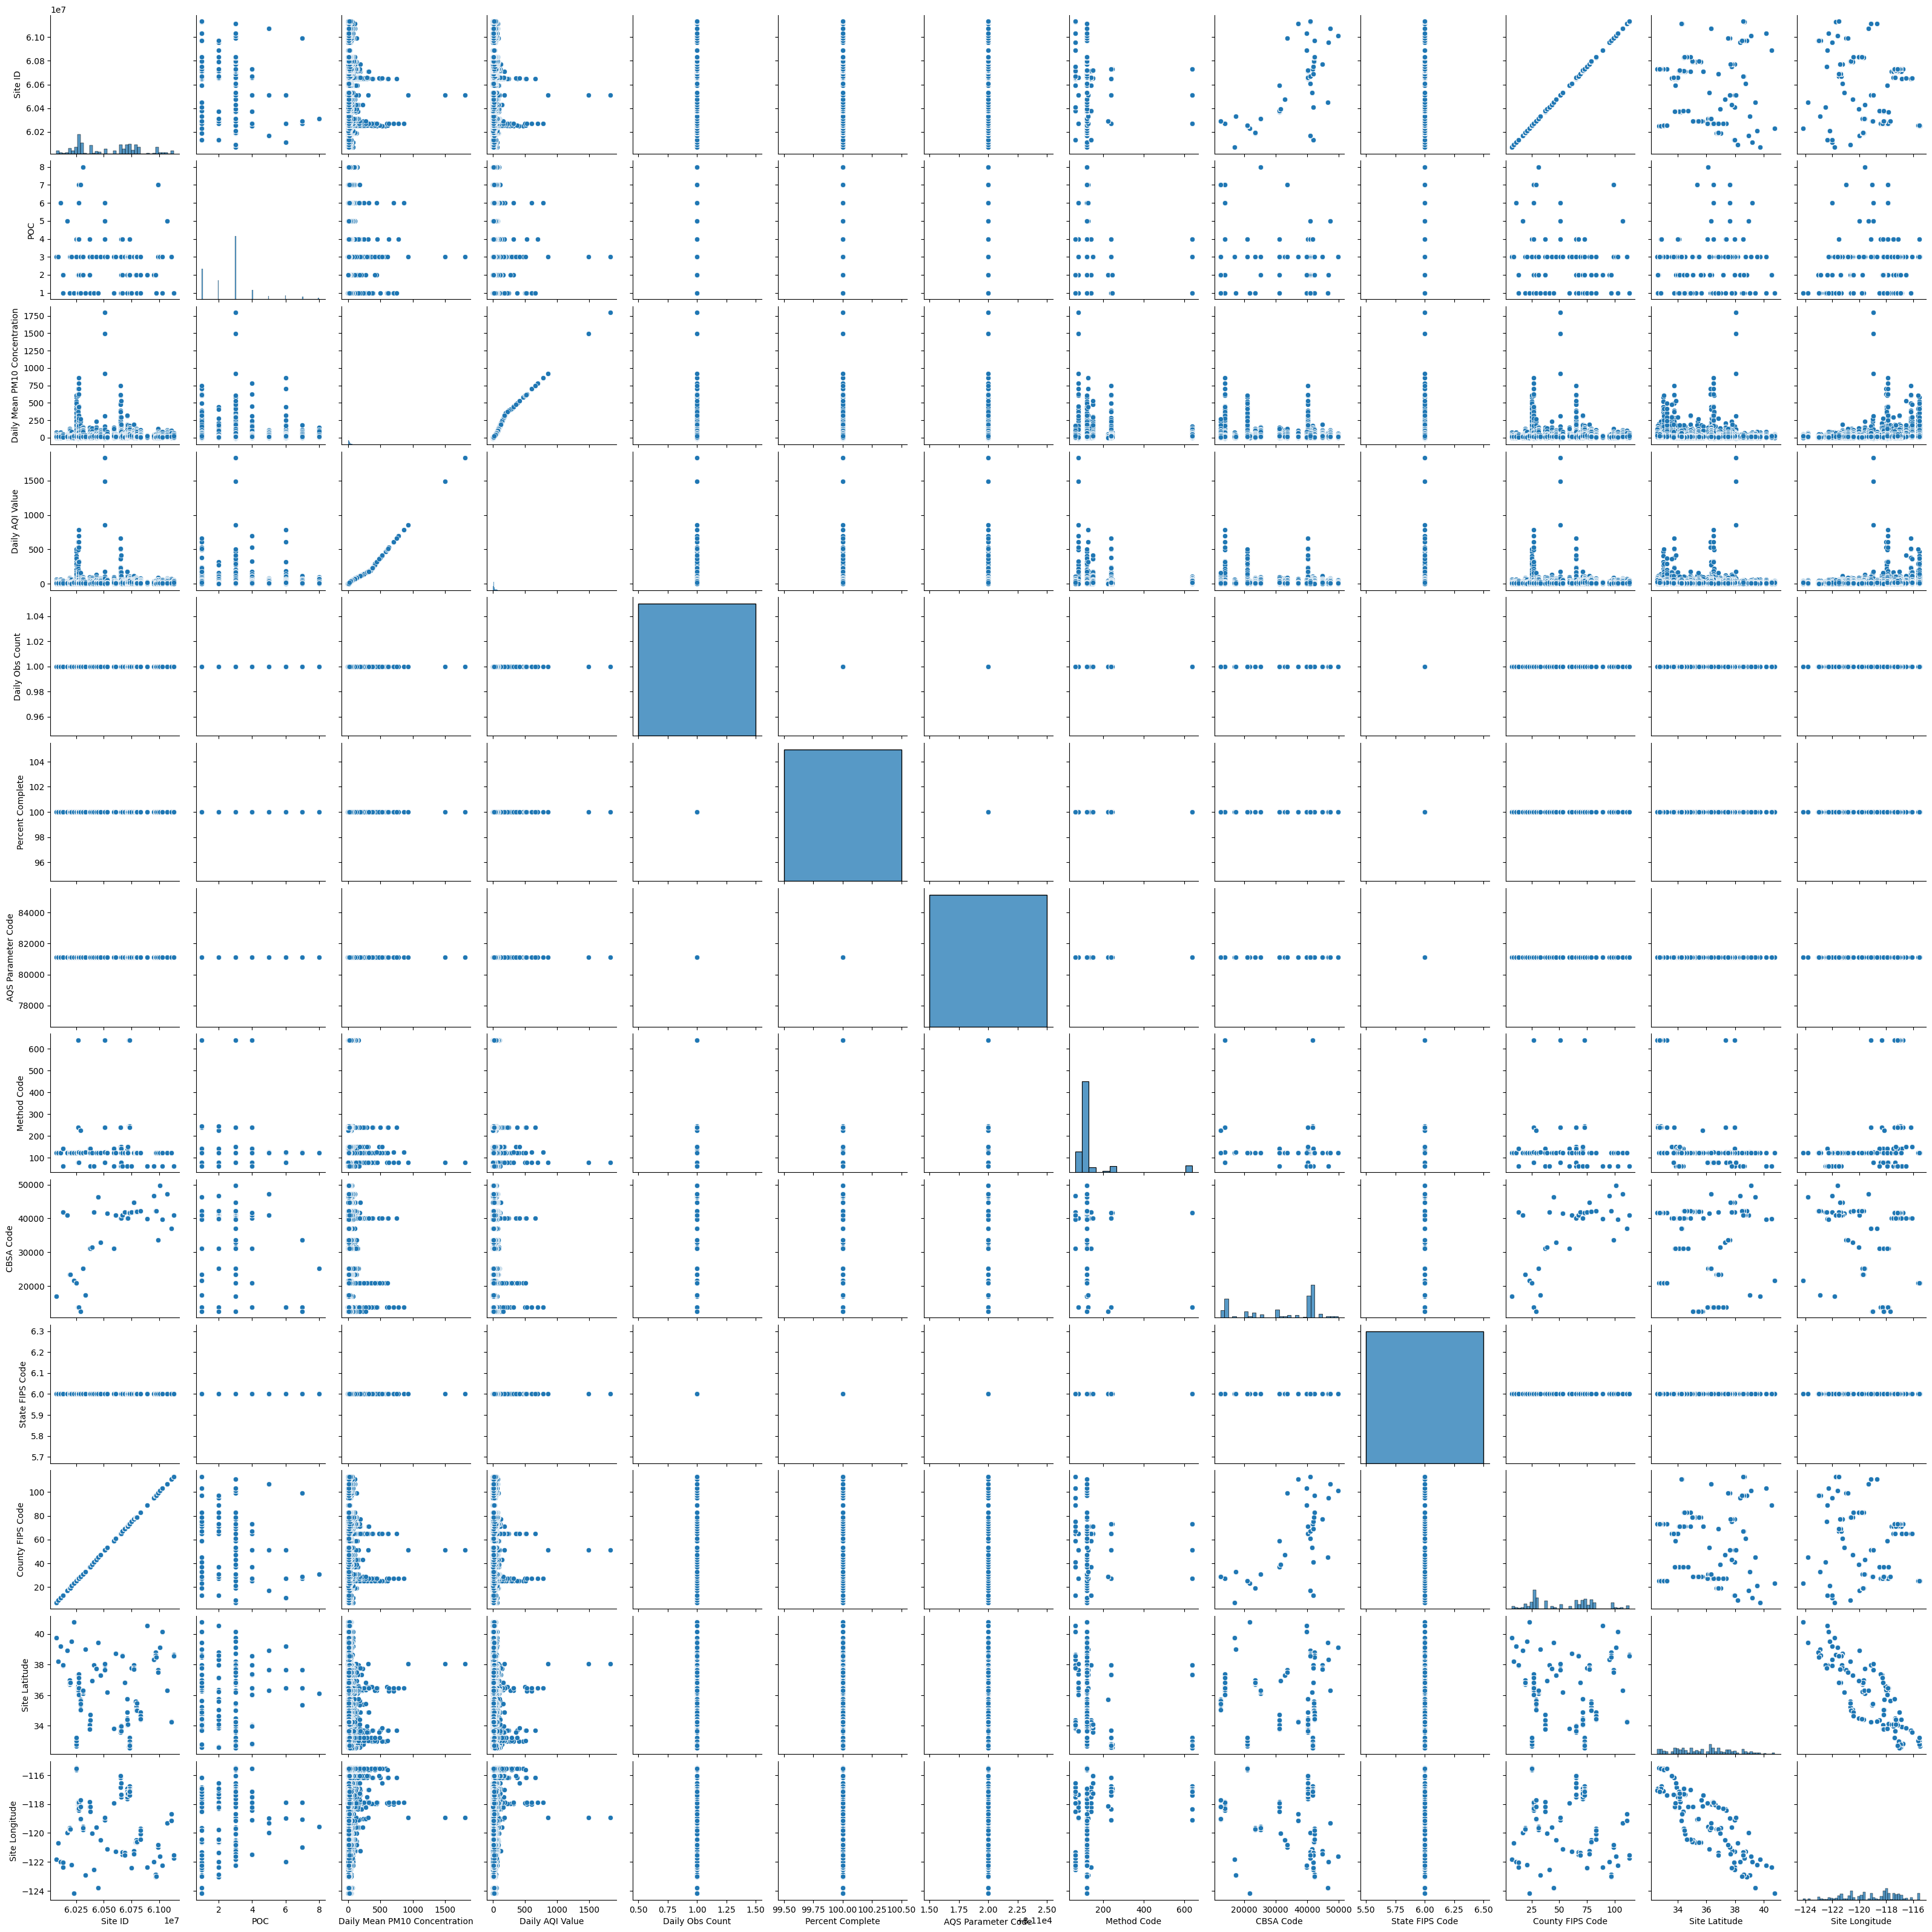

In [122]:
sns.pairplot(df)

<Axes: ylabel='Frequency'>

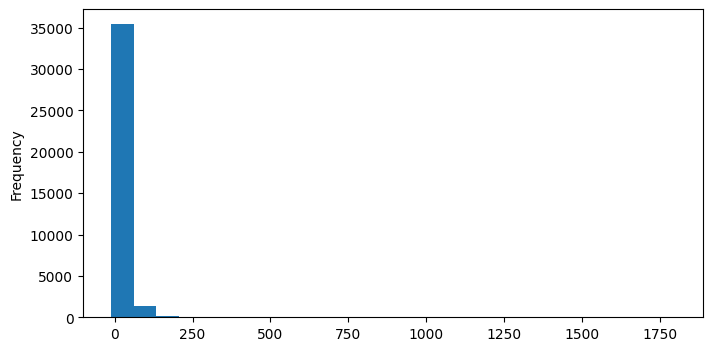

In [123]:
df['Daily Mean PM10 Concentration'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

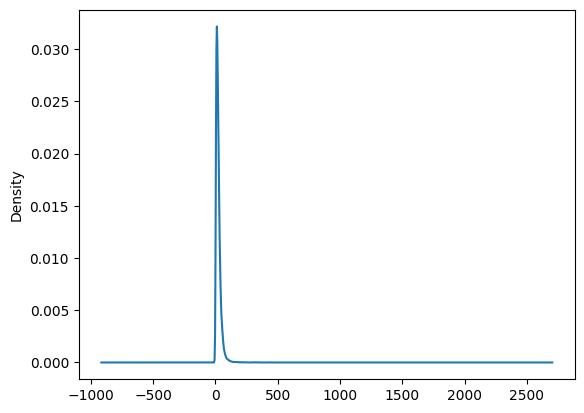

In [124]:
df['Daily Mean PM10 Concentration'].plot.density()

<Axes: ylabel='Frequency'>

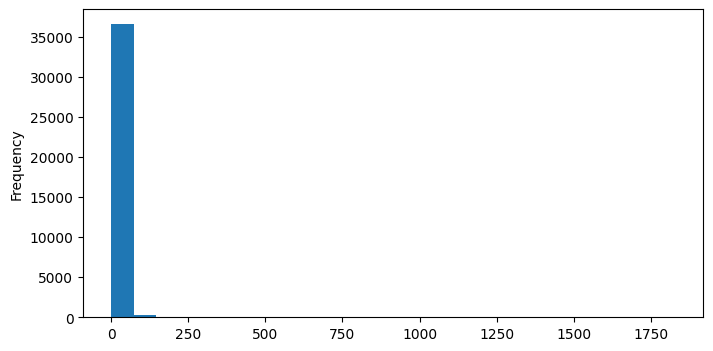

In [125]:
df['Daily AQI Value'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

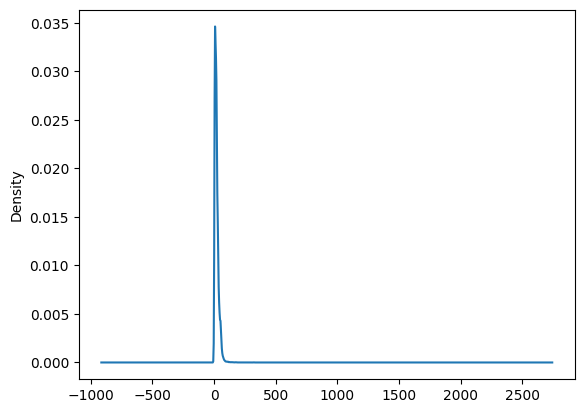

In [126]:
df['Daily AQI Value'].plot.density()

In [127]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Site ID,POC,Daily Mean PM10 Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
Site ID,1.000000,-0.060863,-0.064698,-0.061010,NaN,NaN,NaN,0.151822,0.817729,NaN,0.999964,-0.146002,-0.216650
POC,-0.060863,1.000000,0.097844,0.104062,NaN,NaN,NaN,0.057386,-0.020758,NaN,-0.060383,0.045896,0.003818
Daily Mean PM10 Concentration,-0.064698,0.097844,1.000000,0.983232,NaN,NaN,NaN,0.018019,-0.054360,NaN,-0.065176,-0.152821,0.173707
Daily AQI Value,-0.061010,0.104062,0.983232,1.000000,NaN,NaN,NaN,0.019584,-0.050594,NaN,-0.061527,-0.153678,0.170322
Daily Obs Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percent Complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQS Parameter Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Method Code,0.151822,0.057386,0.018019,0.019584,NaN,NaN,NaN,1.000000,0.205988,NaN,0.152715,-0.322810,0.236178
CBSA Code,0.817729,-0.020758,-0.054360,-0.050594,NaN,NaN,NaN,0.205988,1.000000,NaN,0.816619,-0.100088,-0.307247
State FIPS Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

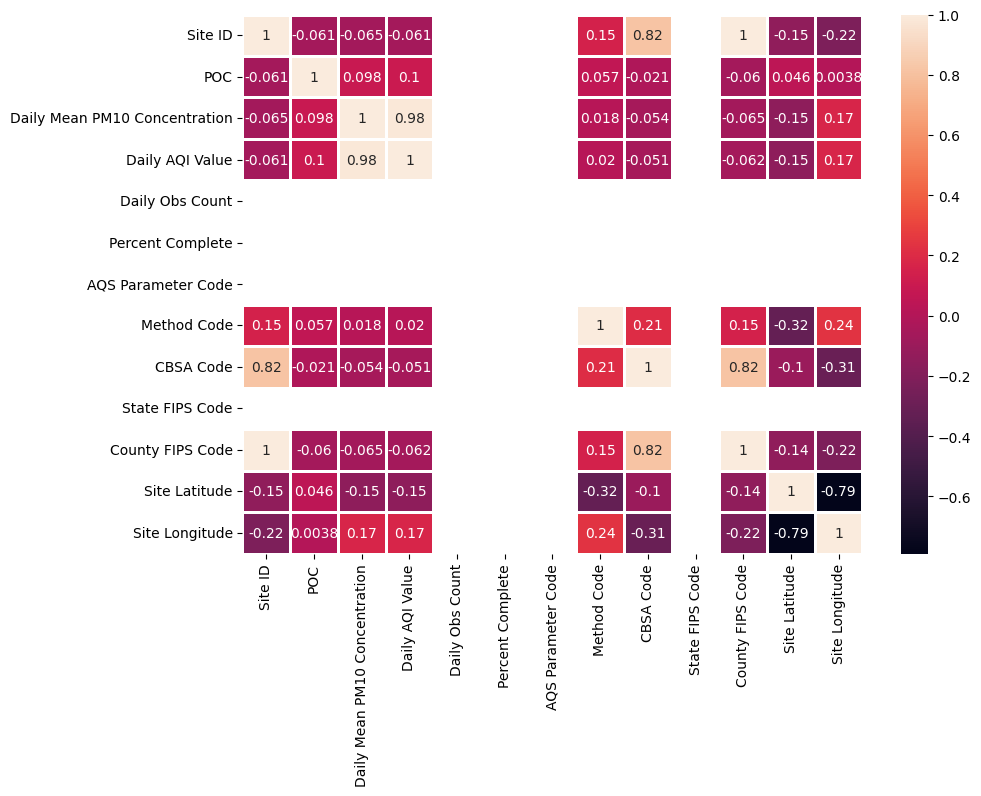

In [128]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

In [129]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['Date',
 'Source',
 'Site ID',
 'POC',
 'Daily Mean PM10 Concentration',
 'Units',
 'Daily AQI Value',
 'Local Site Name',
 'Daily Obs Count',
 'Percent Complete',
 'AQS Parameter Code',
 'AQS Parameter Description',
 'Method Code',
 'CBSA Code',
 'CBSA Name',
 'State FIPS Code',
 'State',
 'County FIPS Code',
 'County',
 'Site Latitude',
 'Site Longitude']

In [130]:
X = df[l_column[4:len_feature-16]]
y = df[l_column[len_feature-15]]

In [131]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (36961, 1)
Tamaño de Variable Objetivo: (36961,)


In [132]:
X.head()

,Daily Mean PM10 Concentration
0,7
1,9
2,5
3,4
4,3


In [133]:
y.head()

,Daily AQI Value
0,6
1,8
2,5
3,4
4,3


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [136]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (25872, 1)
Tamaño del conjunto de características de prueba: (11089, 1)
Tamaño de la variable objetivo del entrenamiento: (25872,)
Tamaño de la variable objetivo de prueba: (11089,)


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [138]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Ejemplo de datos de entrenamiento
# Asegúrate de que X_train e y_train estén definidos correctamente
# X_train debería ser una matriz de 2D (n_samples, n_features)
# y_train debería ser un vector o una matriz de 1D (n_samples,)

# Ejemplo de inicialización de datos
X_train = np.array([[1, 2], [2, 3], [3, 4]])  # Reemplaza con tus datos
y_train = np.array([2, 3, 4])  # Reemplaza con tus datos

# Creando un objeto de Regresión Lineal 'lm'
lm = LinearRegression()

# Ajustando el modelo lineal con los datos de entrenamiento
lm.fit(X_train, y_train)

# Ejemplo de predicción (opcional)
# X_test = np.array([[4, 5]])  # Reemplaza con tus datos
# y_pred = lm.predict(X_test)
# print(y_pred)


LinearRegression()

In [139]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: 0.5000000000000004


In [140]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [0.5 0.5]


In [141]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Ejemplo de datos de entrenamiento con pandas DataFrame
X_train = pd.DataFrame({
    'Feature1': [1, 2, 3],
    'Feature2': [2, 3, 4]
})
y_train = np.array([2, 3, 4])

# Creando un objeto de Regresión Lineal 'lm'
lm = LinearRegression()

# Ajustando el modelo lineal con los datos de entrenamiento
lm.fit(X_train, y_train)

# Creando un DataFrame para almacenar los coeficientes
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
print(cdf)


          Coefficients
Feature1           0.5
Feature2           0.5


In [143]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Ejemplo de datos de entrenamiento con pandas DataFrame
X_train = pd.DataFrame({
    'Feature1': [1, 2, 3],
    'Feature2': [2, 3, 4]
})
y_train = np.array([2, 3, 4])

# Creando un objeto de Regresión Lineal 'lm'
lm = LinearRegression()

# Ajustando el modelo lineal con los datos de entrenamiento
lm.fit(X_train, y_train)

# Creando un DataFrame para almacenar los coeficientes
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])

# Cálculo del error estándar y estadísticos t
n = X_train.shape[0]  # Número de observaciones
k = X_train.shape[1]  # Número de predictores
dfN = n - k  # Grados de libertad

# Predicciones en los datos de entrenamiento
train_pred = lm.predict(X_train)

# Cálculo del error cuadrático
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)

# Inicialización correcta de la lista 'se' con la longitud 'k'
se = [0] * k

for i in range(k):
    r = (sum_error / dfN)
    r = r / np.sum(np.square(X_train.iloc[:, i] - X_train.iloc[:, i].mean()))
    se[i] = np.sqrt(r)

# Agregando el error estándar y el estadístico t al DataFrame 'cdf'
cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']

# Mostrar el DataFrame con los resultados
print(cdf)

          Coefficients  Standard Error  t-statistic
Feature1           0.5             0.0          inf
Feature2           0.5             0.0          inf


In [144]:
print("Por lo tanto, las características organizadasen orden de importancia para predecir la concentración de PM10\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadasen orden de importancia para predecir la concentración de PM10
------------------------------------------------------------------------------------------
Feature1 > 
Feature2


In [145]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Asegurándote de que las columnas en l existen en df
l = list(cdf.index)
for feature in l:
    if feature not in df.columns:
        print(f"La columna '{feature}' no se encuentra en el DataFrame.")
        continue

# Crear la figura y la rejilla de subplots
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3)

# Graficar solo si la columna existe en df
if l[0] in df.columns:
    ax = plt.subplot(gs[0])
    ax.scatter(df[l[0]], df['Daily AQI Value'])
    ax.set_title(f"{l[0]} vs. Daily AQI Value", fontdict={'fontsize': 20})

plt.show()

La columna 'Feature1' no se encuentra en el DataFrame.
La columna 'Feature2' no se encuentra en el DataFrame.


<Figure size 1800x1000 with 0 Axes>

In [146]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 1.0


#DATA 2022 Y 2023


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests
from io import StringIO

In [149]:
df = pd.read_csv("/content/drive/MyDrive/datos/22 23.csv")
df.head()
try:
    response = requests.get(df)
    response.raise_for_status()  # Verifica si hubo errores en la solicitud
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data)
    print(df)
except Exception as e:
    print(f'Ocurrió un error: {e}')

Ocurrió un error: Invalid URL 'Date Source   Site ID POC Daily Mean PM10 Concentration  \\\n0      01/01/2022    AQS  60070008   3                            27   \n1      01/02/2022    AQS  60070008   3                            19   \n2      01/03/2022    AQS  60070008   3                             8   \n3      01/04/2022    AQS  60070008   3                             6   \n4      01/11/2022    AQS  60070008   3                            24   \n...           ...    ...       ...  ..                           ...   \n73042  12/02/2023    AQS  61132001   1                             7   \n73043  12/08/2023    AQS  61132001   1                             6   \n73044  12/14/2023    AQS  61132001   1                            38   \n73045  12/20/2023    AQS  61132001   1                             7   \n73046  12/26/2023    AQS  61132001   1                            24   \n\n          Units Daily AQI Value              Local Site Name Daily Obs Count  \\\n0      ug/m3 SC      

<ipython-input-149-8ef04b132340>:1: DtypeWarning: Columns (2,3,4,6,8,10,12,13,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/datos/22 23.csv")


In [150]:
df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2022,AQS,60070008,3,27,ug/m3 SC,25,Chico-East Avenue,1,1.000.000,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,3.976.168,-12.184.047
1,01/02/2022,AQS,60070008,3,19,ug/m3 SC,18,Chico-East Avenue,1,1.000.000,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,3.976.168,-12.184.047
2,01/03/2022,AQS,60070008,3,8,ug/m3 SC,7,Chico-East Avenue,1,1.000.000,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,3.976.168,-12.184.047
3,01/04/2022,AQS,60070008,3,6,ug/m3 SC,6,Chico-East Avenue,1,1.000.000,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,3.976.168,-12.184.047
4,01/11/2022,AQS,60070008,3,24,ug/m3 SC,22,Chico-East Avenue,1,1.000.000,...,PM10 Total 0-10um STP,122,17020.0,"Chico, CA",6,California,7,Butte,3.976.168,-12.184.047


In [151]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73047 entries, 0 to 73046
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Date                           73047 non-null  object
 1   Source                         73047 non-null  object
 2   Site ID                        73046 non-null  object
 3   POC                            73047 non-null  object
 4   Daily Mean PM10 Concentration  73047 non-null  object
 5   Units                          73047 non-null  object
 6   Daily AQI Value                73047 non-null  object
 7   Local Site Name                73047 non-null  object
 8   Daily Obs Count                73047 non-null  object
 9   Percent Complete               73047 non-null  object
 10  AQS Parameter Code             73047 non-null  object
 11  AQS Parameter Description      73047 non-null  object
 12  Method Code                    72514 non-null  object
 13  C

In [152]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
count,73047,73047,73046,73047,73047,73047,73047,73047,73047,73047,...,73047,72514,68291.0,68291,73047,73047,73047,73047,73047,73047
unique,731,3,234,17,583,2,417,130,3,2,...,2,24,58.0,30,3,2,83,43,130,130
top,12/07/2022,AQS,60271003,3,14,ug/m3 SC,6,Keeler,1,1.000.000,...,PM10 Total 0-10um STP,122,40140.0,"Riverside-San Bernardino-Ontario, CA",6,California,27,Inyo,36.487.823,-117.871.036
freq,130,72513,744,17988,1288,73046,2152,1480,40279,73046,...,73046,29062,5628.0,10457,40279,73046,5297,10359,1480,1480


In [153]:
df.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM10 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')

In [154]:
df.dtypes

,0
Date,object
Source,object
Site ID,object
POC,object
Daily Mean PM10 Concentration,object
Units,object
Daily AQI Value,object
Local Site Name,object
Daily Obs Count,object
Percent Complete,object


In [156]:
# Suponiendo que 'Daily Mean PM2.5 Concentration' y 'Daily AQI Value' son numéricas
df['Daily Mean PM10 Concentration'] = pd.to_numeric(df['Daily Mean PM10 Concentration'], errors='coerce')
df['Daily AQI Value'] = pd.to_numeric(df['Daily AQI Value'], errors='coerce')

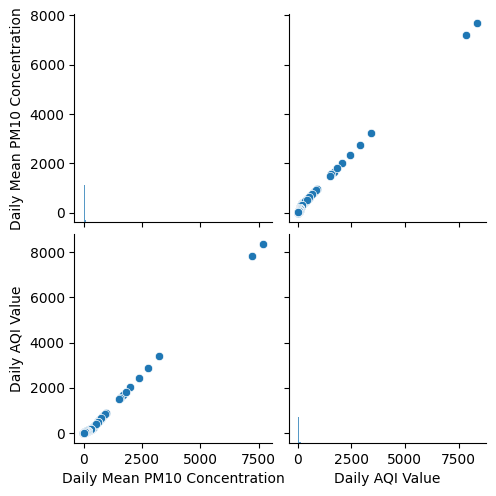

In [157]:
numeric_cols = df.select_dtypes(include=['number']).columns
sns.pairplot(df[numeric_cols])

<Axes: ylabel='Frequency'>

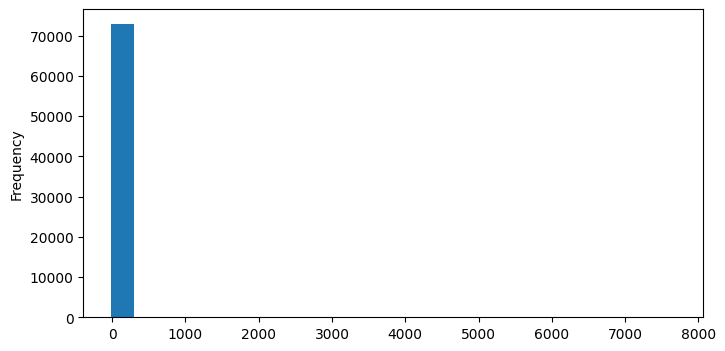

In [159]:
df['Daily Mean PM10 Concentration'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

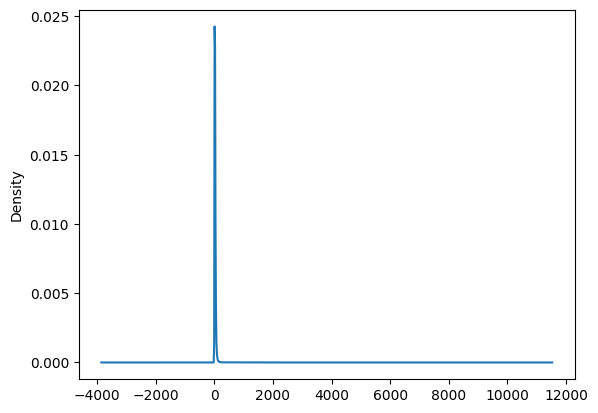

In [161]:
df['Daily Mean PM10 Concentration'].plot.density()

<Axes: ylabel='Frequency'>

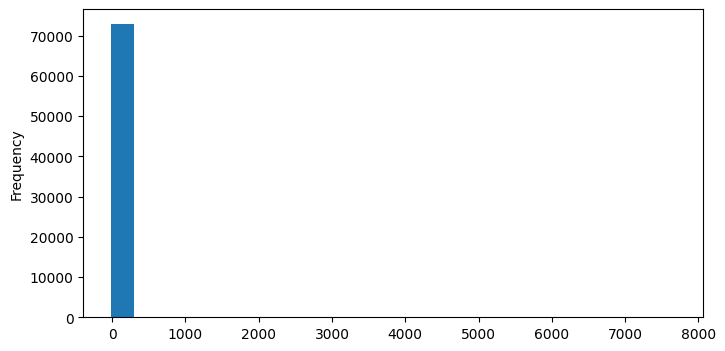

In [162]:
df['Daily Mean PM10 Concentration'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

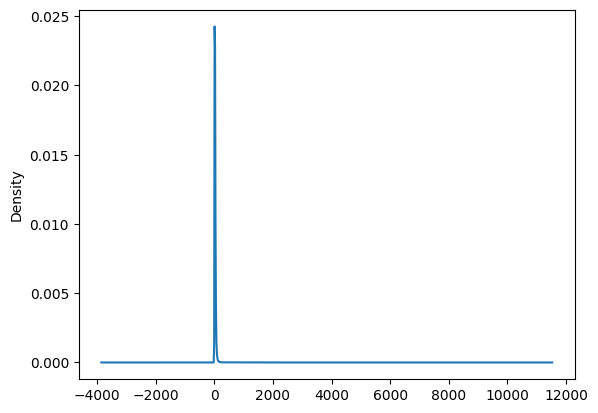

In [163]:
df['Daily Mean PM10 Concentration'].plot.density()

In [164]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Daily Mean PM10 Concentration,Daily AQI Value
Daily Mean PM10 Concentration,1.000000,0.986762
Daily AQI Value,0.986762,1.000000


<Axes: >

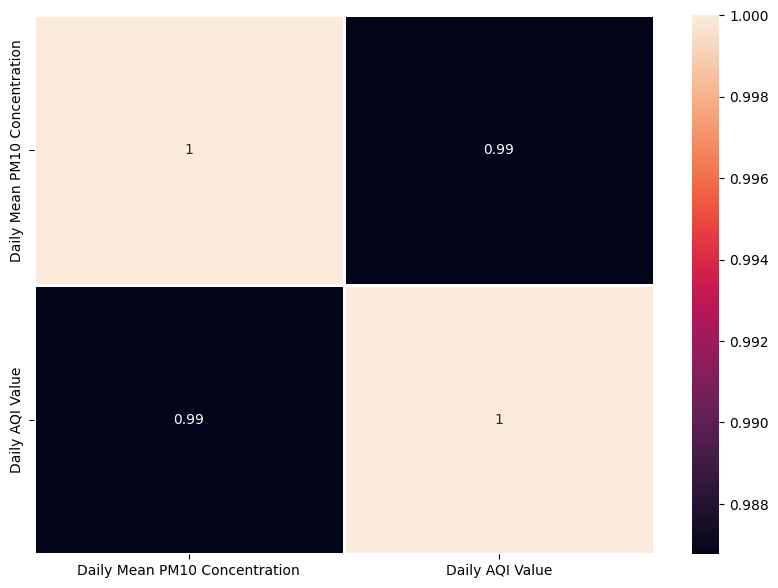

In [165]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

In [166]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['Date',
 'Source',
 'Site ID',
 'POC',
 'Daily Mean PM10 Concentration',
 'Units',
 'Daily AQI Value',
 'Local Site Name',
 'Daily Obs Count',
 'Percent Complete',
 'AQS Parameter Code',
 'AQS Parameter Description',
 'Method Code',
 'CBSA Code',
 'CBSA Name',
 'State FIPS Code',
 'State',
 'County FIPS Code',
 'County',
 'Site Latitude',
 'Site Longitude']

In [167]:
X = df[l_column[4:len_feature-16]]
y = df[l_column[len_feature-15]]

In [168]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (73047, 1)
Tamaño de Variable Objetivo: (73047,)


In [169]:
X.head()

,Daily Mean PM10 Concentration
0,27.0
1,19.0
2,8.0
3,6.0
4,24.0


In [170]:
y.head()

,Daily AQI Value
0,25.0
1,18.0
2,7.0
3,6.0
4,22.0


In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [173]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (51132, 1)
Tamaño del conjunto de características de prueba: (21915, 1)
Tamaño de la variable objetivo del entrenamiento: (51132,)
Tamaño de la variable objetivo de prueba: (21915,)


In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [175]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Ejemplo de datos de entrenamiento
# Asegúrate de que X_train e y_train estén definidos correctamente
# X_train debería ser una matriz de 2D (n_samples, n_features)
# y_train debería ser un vector o una matriz de 1D (n_samples,)

# Ejemplo de inicialización de datos
X_train = np.array([[1, 2], [2, 3], [3, 4]])  # Reemplaza con tus datos
y_train = np.array([2, 3, 4])  # Reemplaza con tus datos

# Creando un objeto de Regresión Lineal 'lm'
lm = LinearRegression()

# Ajustando el modelo lineal con los datos de entrenamiento
lm.fit(X_train, y_train)

# Ejemplo de predicción (opcional)
# X_test = np.array([[4, 5]])  # Reemplaza con tus datos
# y_pred = lm.predict(X_test)
# print(y_pred)


LinearRegression()

In [176]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: 0.5000000000000004


In [177]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [0.5 0.5]


In [178]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Ejemplo de datos de entrenamiento con pandas DataFrame
X_train = pd.DataFrame({
    'Feature1': [1, 2, 3],
    'Feature2': [2, 3, 4]
})
y_train = np.array([2, 3, 4])

# Creando un objeto de Regresión Lineal 'lm'
lm = LinearRegression()

# Ajustando el modelo lineal con los datos de entrenamiento
lm.fit(X_train, y_train)

# Creando un DataFrame para almacenar los coeficientes
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
print(cdf)


          Coefficients
Feature1           0.5
Feature2           0.5


In [179]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Ejemplo de datos de entrenamiento con pandas DataFrame
X_train = pd.DataFrame({
    'Feature1': [1, 2, 3],
    'Feature2': [2, 3, 4]
})
y_train = np.array([2, 3, 4])

# Creando un objeto de Regresión Lineal 'lm'
lm = LinearRegression()

# Ajustando el modelo lineal con los datos de entrenamiento
lm.fit(X_train, y_train)

# Creando un DataFrame para almacenar los coeficientes
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])

# Cálculo del error estándar y estadísticos t
n = X_train.shape[0]  # Número de observaciones
k = X_train.shape[1]  # Número de predictores
dfN = n - k  # Grados de libertad

# Predicciones en los datos de entrenamiento
train_pred = lm.predict(X_train)

# Cálculo del error cuadrático
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)

# Inicialización correcta de la lista 'se' con la longitud 'k'
se = [0] * k

for i in range(k):
    r = (sum_error / dfN)
    r = r / np.sum(np.square(X_train.iloc[:, i] - X_train.iloc[:, i].mean()))
    se[i] = np.sqrt(r)

# Agregando el error estándar y el estadístico t al DataFrame 'cdf'
cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']

# Mostrar el DataFrame con los resultados
print(cdf)

          Coefficients  Standard Error  t-statistic
Feature1           0.5             0.0          inf
Feature2           0.5             0.0          inf


In [181]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir la concentración de PM10\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadas en orden de importancia para predecir la concentración de PM10
------------------------------------------------------------------------------------------
Feature1 > 
Feature2


In [182]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Asegurándote de que las columnas en l existen en df
l = list(cdf.index)
for feature in l:
    if feature not in df.columns:
        print(f"La columna '{feature}' no se encuentra en el DataFrame.")
        continue

# Crear la figura y la rejilla de subplots
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3)

# Graficar solo si la columna existe en df
if l[0] in df.columns:
    ax = plt.subplot(gs[0])
    ax.scatter(df[l[0]], df['Daily AQI Value'])
    ax.set_title(f"{l[0]} vs. Daily AQI Value", fontdict={'fontsize': 20})

plt.show()

La columna 'Feature1' no se encuentra en el DataFrame.
La columna 'Feature2' no se encuentra en el DataFrame.


<Figure size 1800x1000 with 0 Axes>

In [183]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 1.0
